# 📈 let's plot some trees Randoom forest

# 💾 Data

> We are going to use the `titanic-passengers` dataset. Since house price is a continues variable, this is a regression problem.

In [94]:
import graphviz
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.tree import export_graphviz
from sklearn import metrics 
from sklearn import datasets
from sklearn import tree  

#1. Read your Titanic dataset as usual: A training set and Testing set Apply decision tree. 

In [95]:
#Read the data
data = pd.read_csv("titanic-passengers.csv", sep = ";")
data.head

<bound method NDFrame.head of      PassengerId Survived  Pclass  \
0            343       No       2   
1             76       No       3   
2            641       No       3   
3            568       No       3   
4            672       No       1   
..           ...      ...     ...   
886           10      Yes       2   
887           61       No       3   
888          535       No       3   
889          102       No       3   
890          428      Yes       2   

                                                  Name     Sex   Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    male  28.0      0   
1                              Moen, Mr. Sigurd Hansen    male  25.0      0   
2                               Jensen, Mr. Hans Peder    male  20.0      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)  female  29.0      0   
4                               Davidson, Mr. Thornton    male  31.0      1   
..                                                 

In [96]:
#Data cleaning and preprocessing
data['Age'] = data['Age'].fillna((data['Age'].mean()))
data["Cabin"].fillna('G6', inplace=True)
data["Embarked"] = data["Embarked"].fillna('C')

In [97]:
#We delete the useless features
data = data.drop(columns = 'Name')
data = data.drop(columns = 'PassengerId')

#We replace the categorical data with numerical one
data['Survived'].replace(['No','Yes'], [0,1], inplace=True)
data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)

#Transform the categorical data to numerical data
encoder=LabelEncoder()
data['Cabin']=encoder.fit_transform(data['Cabin'])
data['Ticket']=encoder.fit_transform(data['Ticket'])


data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,2,0,28.0,0,0,159,13.0000,145,0
1,0,3,0,25.0,0,0,347,7.6500,140,0
2,0,3,0,20.0,0,0,409,7.8542,145,0
3,0,3,1,29.0,0,4,395,21.0750,145,0
4,0,1,0,31.0,1,0,569,52.0000,38,0


In [98]:
X=data[['Sex','Pclass','Age']]
y=data['Survived']


In [99]:
#Training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [100]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [101]:
print('Accuracy : ', accuracy_score(y_test,y_pred))
print('f1 score : ', f1_score(y_test,y_pred))
print('precision_score : ', precision_score(y_test,y_pred))

Accuracy :  0.888268156424581
f1 score :  0.8529411764705881
precision_score :  0.9354838709677419


In [102]:
max_depth = [3,4,5,6,7]

training_acc_val = []
validation_acc_val = []

for max_depth_val in max_depth:

  model = DecisionTreeClassifier(random_state = 2, max_depth = max_depth_val)
  model.fit(X_train,y_train)

  y_predicted_val = model.predict(X_train)
  y_predicted = model.predict(X_test)

  acc_val = accuracy_score(y_train,y_predicted_val)
  acc_test = accuracy_score(y_test, y_predicted)

  validation_acc_val.append(acc_val)
  training_acc_val.append(acc_test)

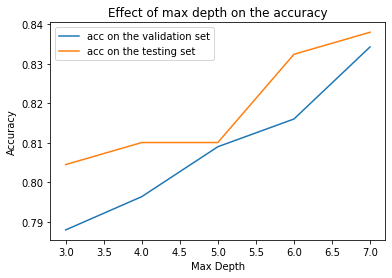

In [103]:
plt.plot(max_depth, validation_acc_val,label = 'acc on the validation set')
plt.plot(max_depth, training_acc_val,label = 'acc on the testing set')
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Effect of max depth on the accuracy")
plt.show()

#The best max depth is 7

In [104]:
model = DecisionTreeClassifier(random_state = 5, max_depth = 7)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=5)

In [105]:
y_predicted_val=model.predict(X_train)
print("The model accuracy on the Validation set : ", accuracy_score(y_train,y_predicted_val))

y_predicted = model.predict(X_test)
print("The model accuracy on the testing set : ", accuracy_score(y_test, y_predicted))

The model accuracy on the Validation set :  0.8342696629213483
The model accuracy on the testing set :  0.8435754189944135


#2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

[Text(1076.01, 1528.875, 'X[0] <= 0.5\ngini = 0.478\nsamples = 712\nvalue = [430, 282]'),
 Text(392.46000000000004, 1325.025, 'X[2] <= 6.5\ngini = 0.326\nsamples = 449\nvalue = [357, 92]'),
 Text(119.04, 1121.175, 'X[1] <= 2.5\ngini = 0.432\nsamples = 19\nvalue = [6, 13]'),
 Text(89.28, 917.3249999999999, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(148.8, 917.3249999999999, 'X[2] <= 2.5\ngini = 0.5\nsamples = 12\nvalue = [6, 6]'),
 Text(89.28, 713.475, 'X[2] <= 1.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(59.52, 509.625, 'X[2] <= 0.71\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(29.76, 305.7750000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(89.28, 305.7750000000001, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(119.04, 509.625, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(208.32000000000002, 713.475, 'X[2] <= 3.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(178.56, 509.625, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(238.08, 50

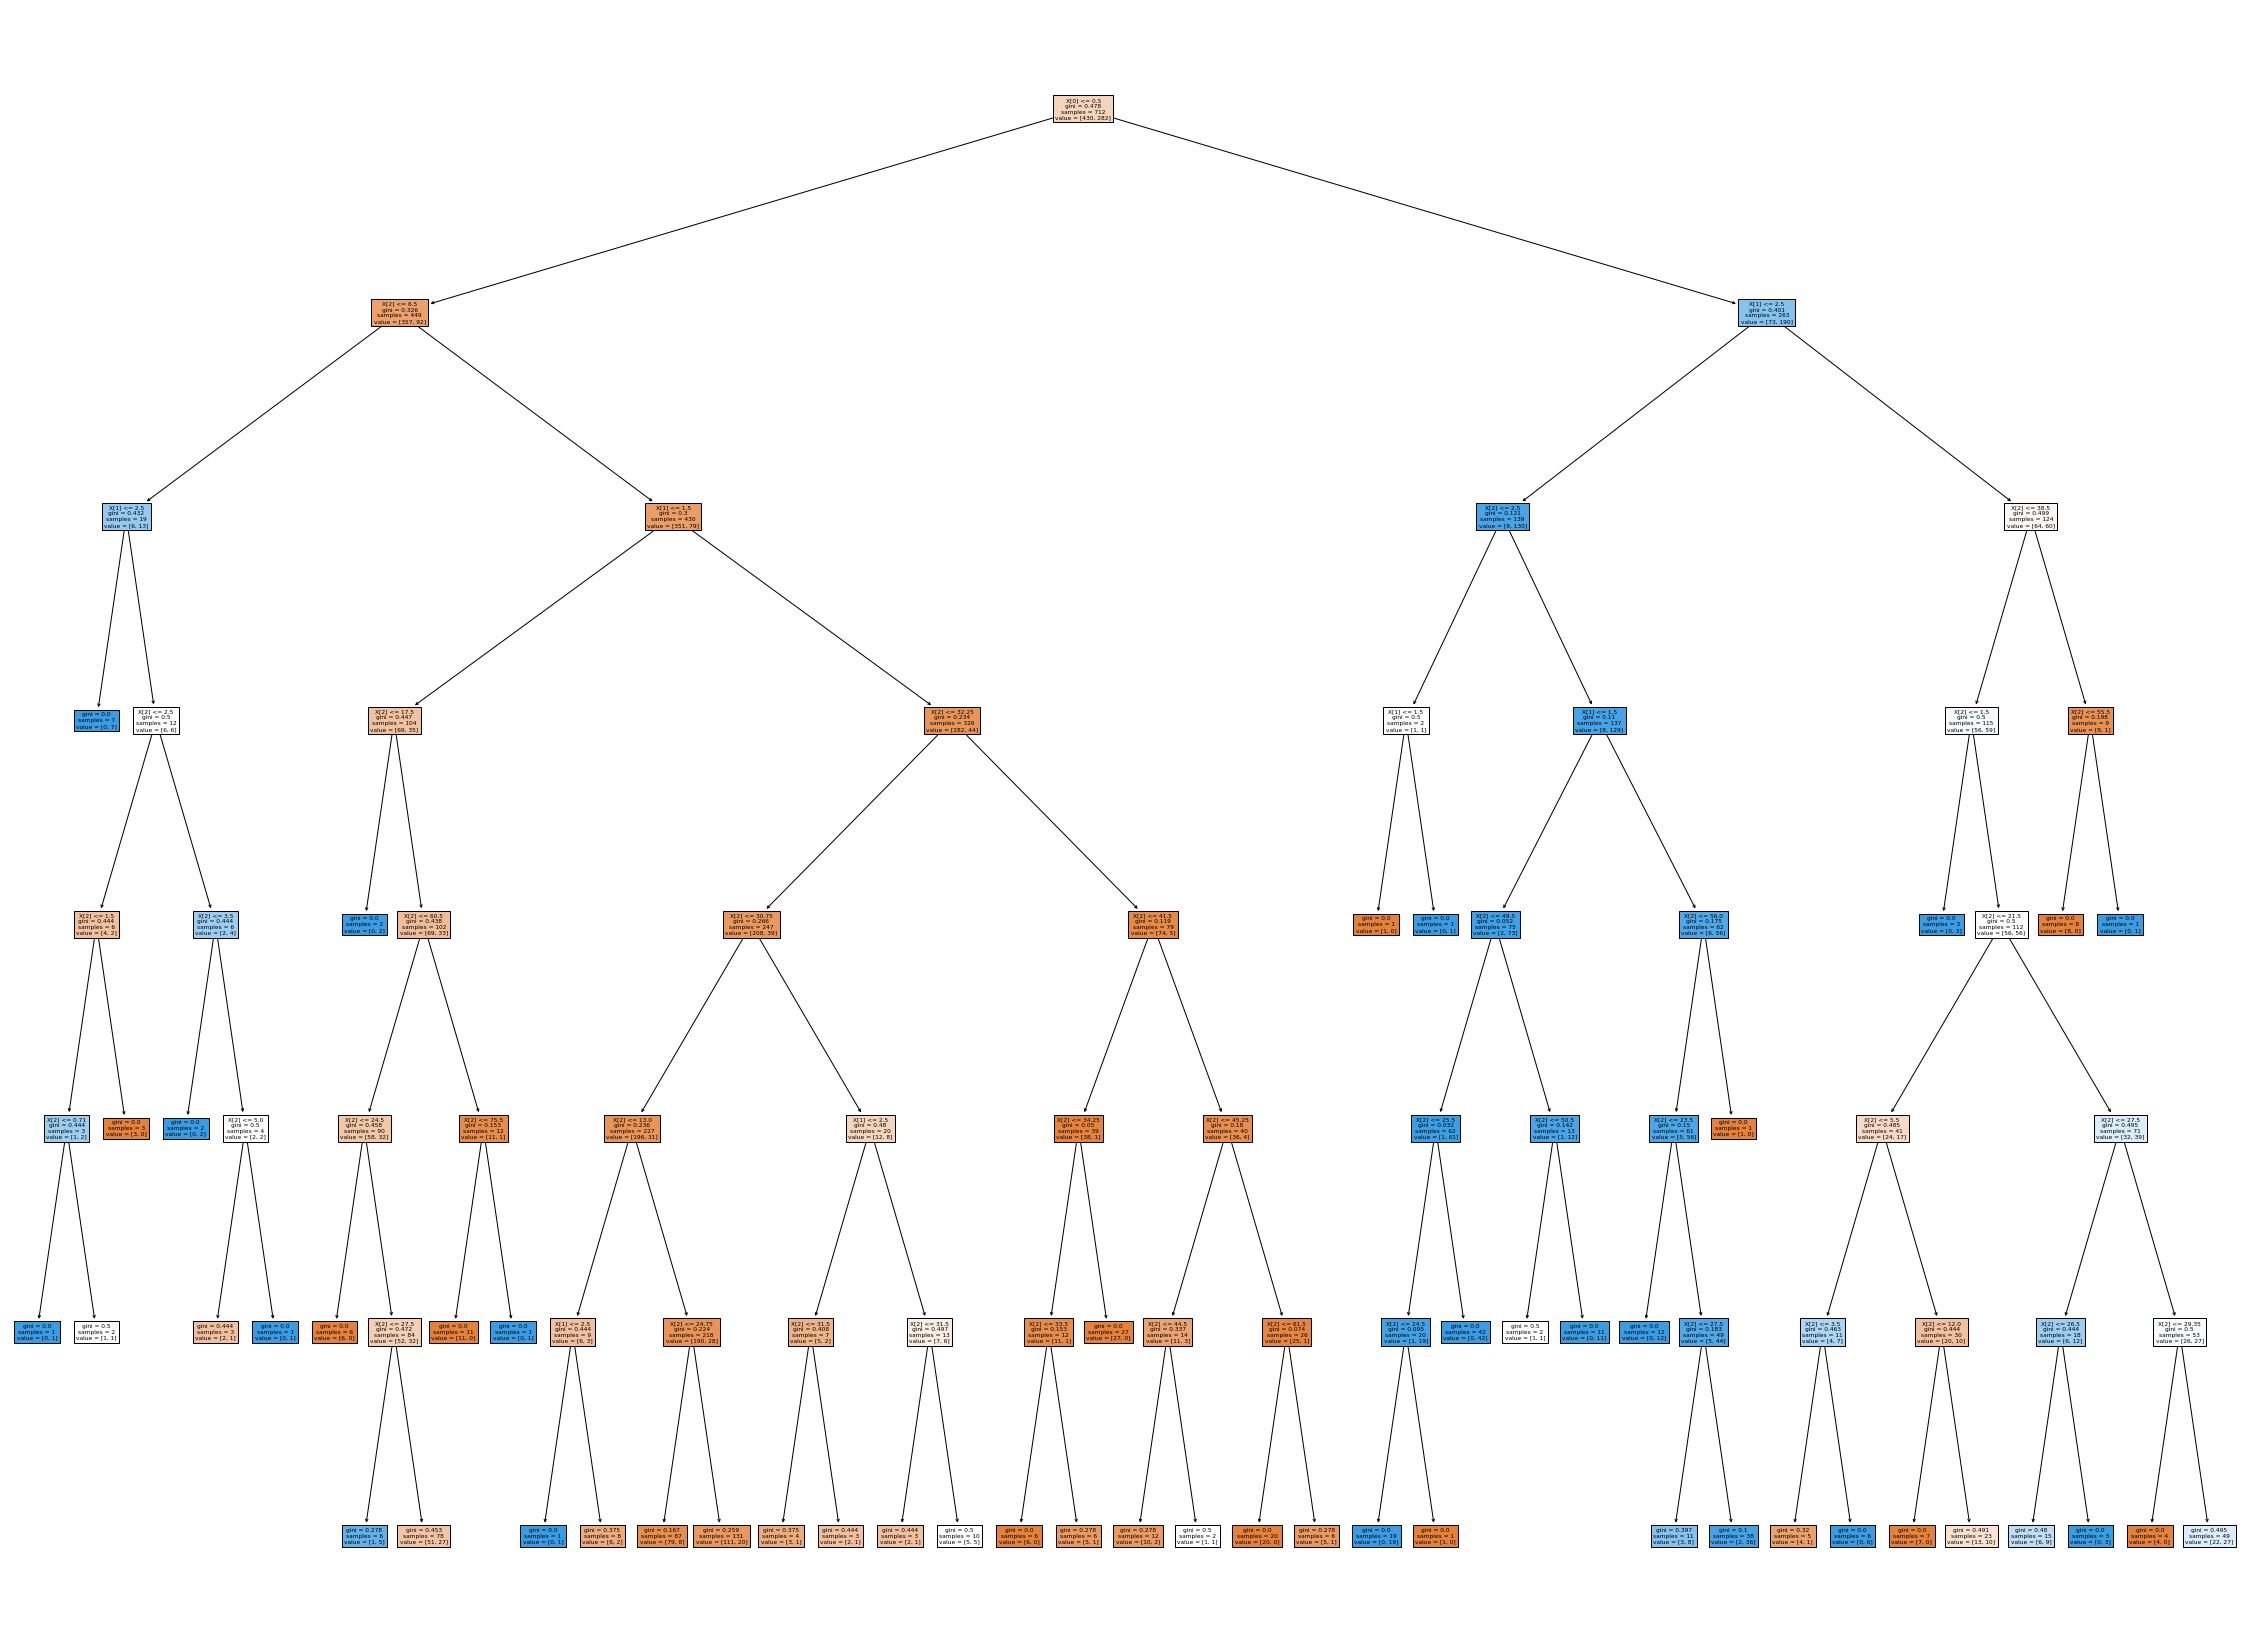

In [106]:
from sklearn import tree
plt.figure(figsize = (40,30))
tree.plot_tree(model, filled = True)

In [107]:
print(tree.export_text(model))

|--- feature_0 <= 0.50
|   |--- feature_2 <= 6.50
|   |   |--- feature_1 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  2.50
|   |   |   |--- feature_2 <= 2.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- feature_2 <= 0.71
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  0.71
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_2 >  2.50
|   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  3.50
|   |   |   |   |   |--- feature_2 <= 5.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  5.00
|   |   |   |   |   |   |--- class: 1
|   |--- feature_2 >  6.50
|   |   |--- feature_1 <= 1.50
|   |   |   |--- feature_2 <= 17.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  17.50
|   |   |   |   |--- feature_2 <= 60.50
|   |   |   |   |   |--- feature_2 <= 24.50


#3. Change the decision tree parameters(change at least two parameters)

In [108]:
model = DecisionTreeClassifier(criterion="entropy", splitter="random")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#4. Calculate the new accuracy and compare it with the previous results. 

In [109]:
model_1 = DecisionTreeClassifier(criterion="entropy", splitter="random")
model_1.fit(X_train,y_train)
new_y_predicted_val = model_1.predict(X_train)
print("The model accuracy on the Validation set : ",accuracy_score(y_train, new_y_predicted_val))
new_y_predicted = model_1.predict(X_test)
print("The model accuracy on the testing set : ",accuracy_score(y_test, new_y_predicted))

The model accuracy on the Validation set :  0.8707865168539326
The model accuracy on the testing set :  0.888268156424581


In [110]:
#Now extract the parameters
parameters_dt = model.get_params()

#Now change the parameter you want
parameters_dt['max_depth'] = 3
parameters_dt['max_leaf_nodes']=5
parameters_dt['min_samples_leaf']=3

#Now create a new classifier
new_model = tree.DecisionTreeClassifier(**parameters_dt)

In [111]:
clf = new_model.fit(X, y)
new_data = tree.export_graphviz(new_model,out_file=None)


#5. Use random forest then change the number of estimators

In [112]:
model = RandomForestClassifier(n_estimators = 10)  
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.8770949720670391


In [113]:
model = RandomForestClassifier(n_estimators = 90)  
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.88268156424581


In [114]:
model = RandomForestClassifier(n_estimators = 15)  
model.fit(X_train, y_train)  
y_pred = model.predict(X_test)  
print("Accuracy:", accuracy_score(y_test, y_pred)) 

Accuracy: 0.8659217877094972


In [115]:
#We got 84% which means thant the random forest algorithm is more efficient than the decision tree.
#Even if we change the number of estimator, we still get almost the same result.
#We also notice that the results we got after increasing the number of the estimators are smaller than the other results. 